Dataset Overview:
Dataset shape: (17, 5)

First few rows:
   level           area      mean     lower     upper
0      0          Ghana  0.435242  0.380073  0.489432
1      1  Greater Accra  0.414646  0.353318  0.476888
2      1     North East  0.342142  0.249244  0.435866
3      1     Upper West  0.517982  0.437548  0.594831
4      1     Upper East  0.493750  0.418520  0.571035

Data types:
level      int64
area      object
mean     float64
lower    float64
upper    float64
dtype: object

Basic statistics:
           level       mean      lower      upper
count  17.000000  17.000000  17.000000  17.000000
mean    0.941176   0.449197   0.374160   0.524309
std     0.242536   0.049378   0.048992   0.051225
min     0.000000   0.342142   0.249244   0.435866
25%     1.000000   0.409452   0.345878   0.476888
50%     1.000000   0.445801   0.380073   0.541405
75%     1.000000   0.490529   0.414190   0.567729
max     1.000000   0.517982   0.437548   0.594831

Missing values:
level    0
area     

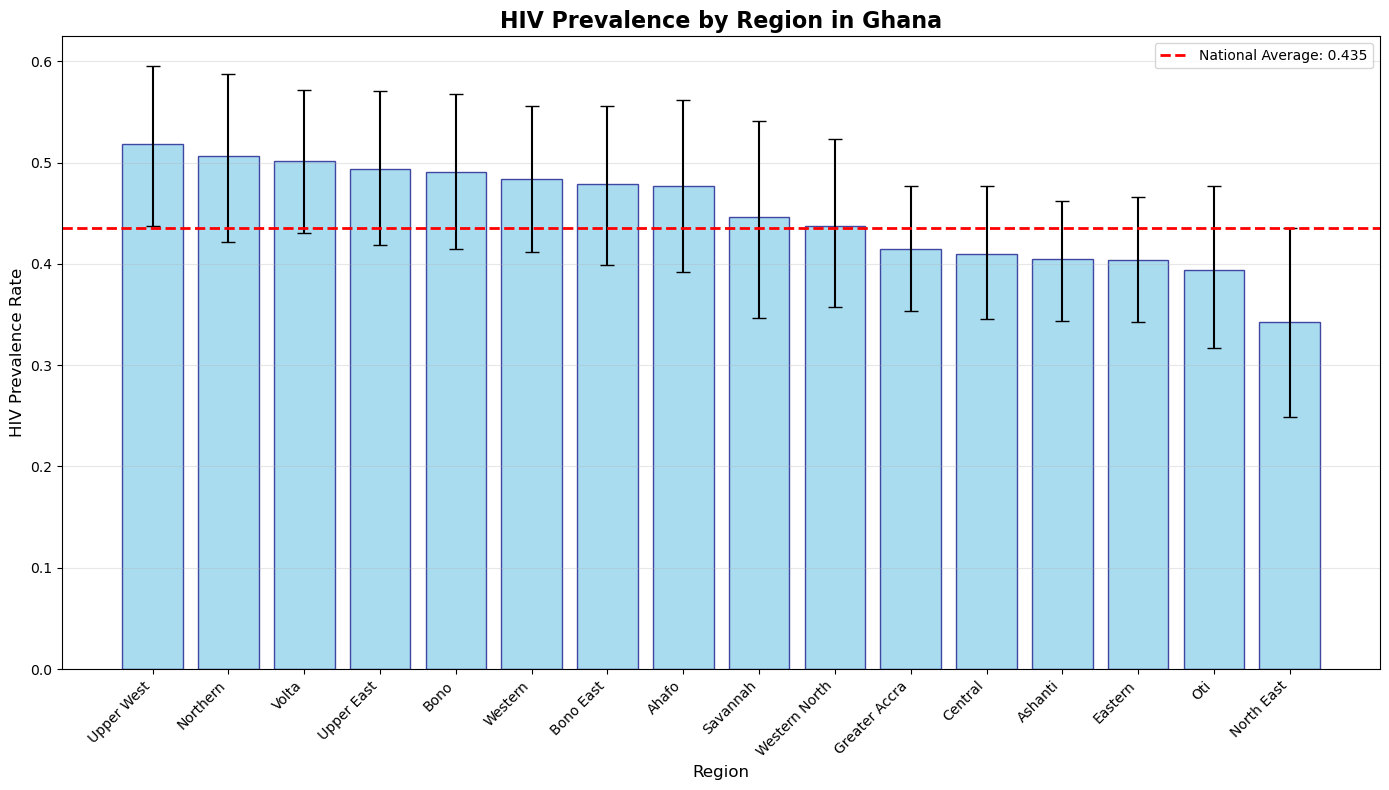

Saved: hiv_plots/02_regional_hiv_prevalence_horizontal.[png|pdf]


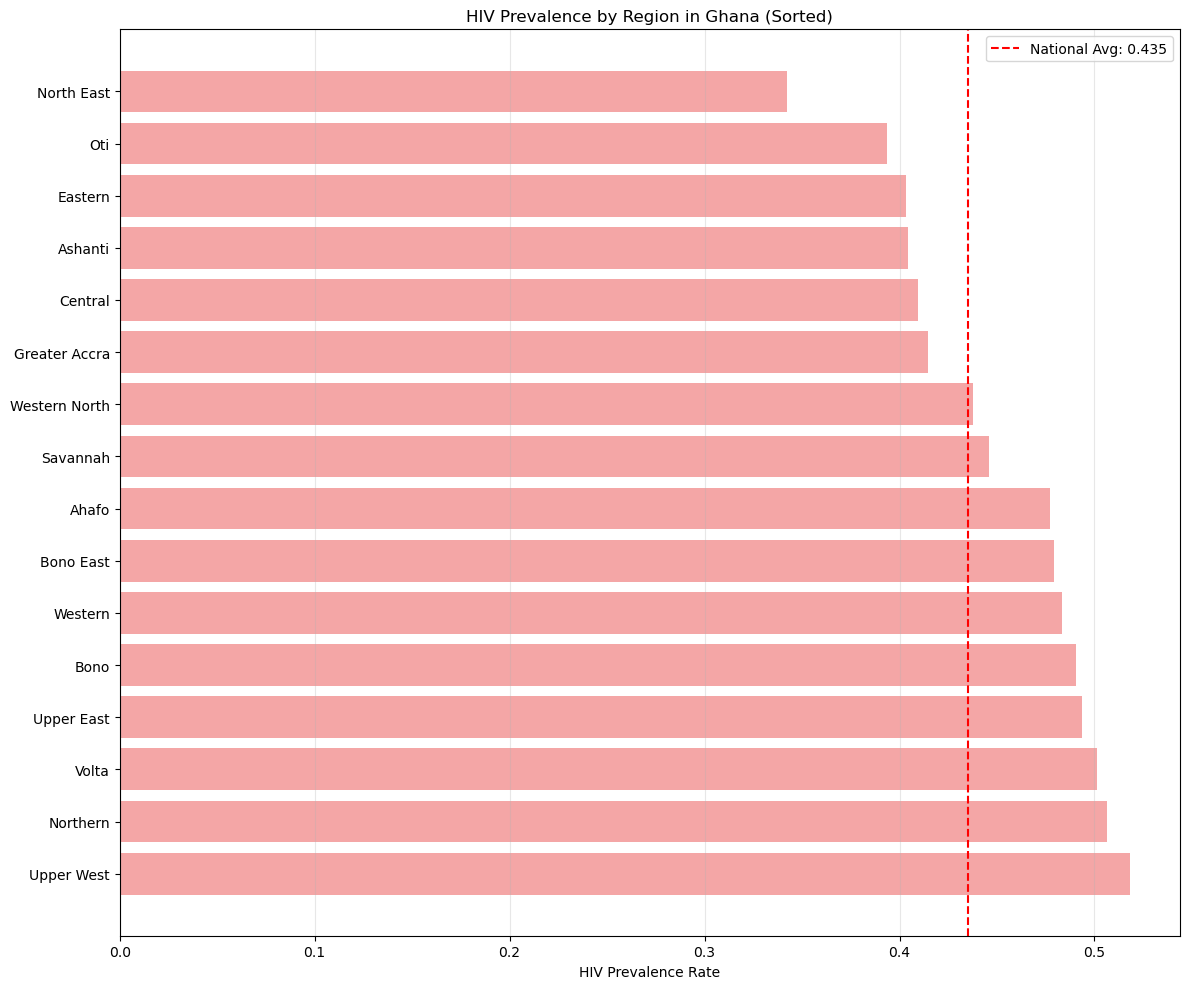


STATISTICAL ANALYSIS
Regional HIV Prevalence Statistics:
Mean prevalence across regions: 0.4501
Median prevalence: 0.4615
Standard deviation: 0.0509
Minimum prevalence: 0.3421 (North East)
Maximum prevalence: 0.5180 (Upper West)
Range: 0.1758

Regions above national average: 10
Regions below national average: 6

Regions with highest prevalence (Top 3):
  Upper West: 0.5180
  Northern: 0.5065
  Volta: 0.5014

Regions with lowest prevalence (Bottom 3):
  North East: 0.3421
  Oti: 0.3938
  Eastern: 0.4035
Saved: hiv_plots/03_hiv_prevalence_distribution_boxplot.[png|pdf]


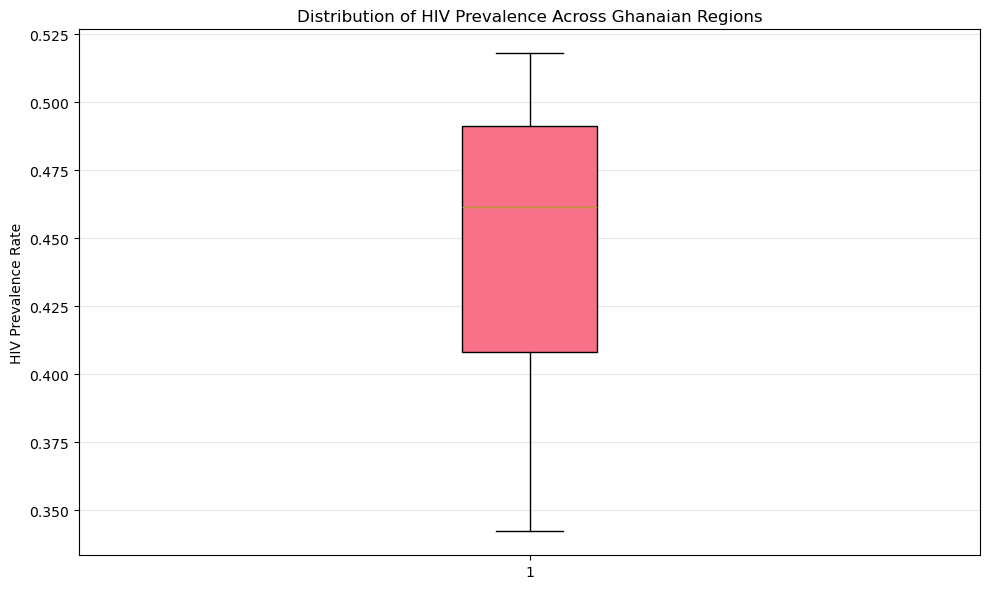

Saved: hiv_plots/04_hiv_prevalence_confidence_intervals.[png|pdf]


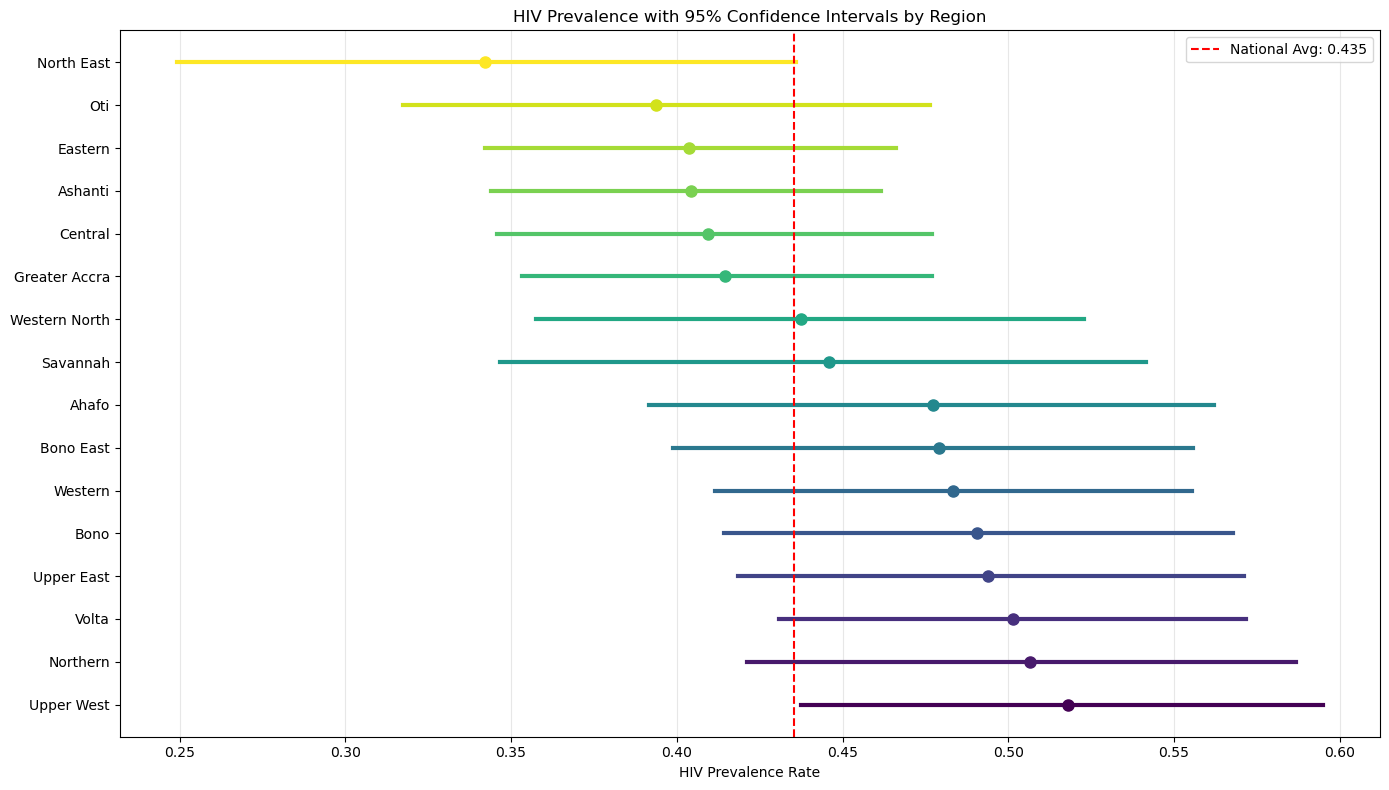

Saved: hiv_plots/05_hiv_prevalence_quartile_distribution.[png|pdf]


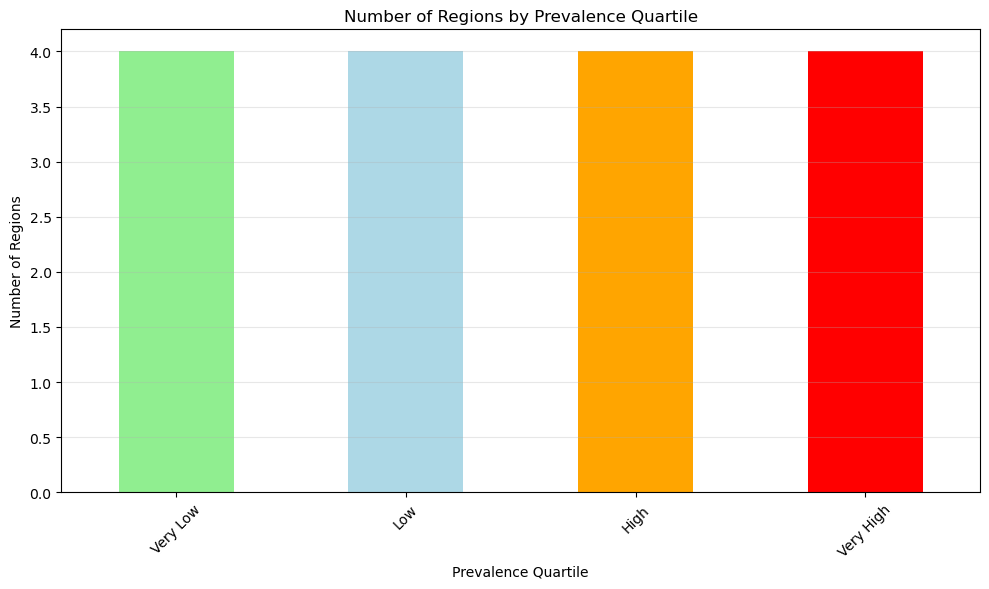


Regional Distribution by Prevalence Quartiles:
prevalence_quartile
Very Low     4
Low          4
High         4
Very High    4
Name: count, dtype: int64

SUMMARY TABLE
             area    mean   lower   upper  difference_from_national  \
3      Upper West  0.5180  0.4375  0.5948                    0.0827   
16       Northern  0.5065  0.4213  0.5869                    0.0712   
9           Volta  0.5014  0.4307  0.5717                    0.0661   
4      Upper East  0.4937  0.4185  0.5710                    0.0585   
6            Bono  0.4905  0.4142  0.5677                    0.0553   
13        Western  0.4834  0.4117  0.5553                    0.0481   
8       Bono East  0.4790  0.3988  0.5556                    0.0438   
7           Ahafo  0.4773  0.3917  0.5622                    0.0420   
5        Savannah  0.4458  0.3465  0.5414                    0.0106   
14  Western North  0.4375  0.3576  0.5229                    0.0023   
1   Greater Accra  0.4146  0.3533  0.4769         

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os

# Create a directory for saving plots
if not os.path.exists('hiv_plots'):
    os.makedirs('hiv_plots')

def save_plot(name, dpi=300):
    """Save plot to hiv_plots directory"""
    filename = f'hiv_plots/{name}'
    plt.savefig(f'{filename}.png', dpi=dpi, bbox_inches='tight', facecolor='white')
    plt.savefig(f'{filename}.pdf', bbox_inches='tight', facecolor='white')
    print(f"Saved: {filename}.[png|pdf]")

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")

# Load the data
df = pd.read_csv('2025-11-22T13_56_50.490Z.csv')

# Display basic information about the dataset
print("Dataset Overview:")
print("=" * 50)
print(f"Dataset shape: {df.shape}")
print("\nFirst few rows:")
print(df.head())
print("\nData types:")
print(df.dtypes)
print("\nBasic statistics:")
print(df.describe())

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Data Exploration
print("\n" + "=" * 50)
print("DATA EXPLORATION")
print("=" * 50)

# Filter regional data (level 1)
regional_data = df[df['level'] == 1].copy()
national_data = df[df['level'] == 0].copy()

print(f"Number of regions: {len(regional_data)}")
print(f"National prevalence: {national_data['mean'].values[0]:.3f}")

# Sort regions by prevalence for better visualization
regional_data_sorted = regional_data.sort_values('mean', ascending=False)
national_avg = national_data['mean'].values[0]

# 1. Basic Bar Plot - Regional HIV Prevalence
plt.figure(figsize=(14, 8))
bars = plt.bar(regional_data_sorted['area'], regional_data_sorted['mean'], 
               color='skyblue', edgecolor='navy', alpha=0.7)

# Add error bars
plt.errorbar(regional_data_sorted['area'], regional_data_sorted['mean'],
             yerr=[regional_data_sorted['mean'] - regional_data_sorted['lower'],
                   regional_data_sorted['upper'] - regional_data_sorted['mean']],
             fmt='none', color='black', capsize=5, capthick=1)

# Add national average line
plt.axhline(y=national_avg, color='red', linestyle='--', linewidth=2, 
            label=f'National Average: {national_avg:.3f}')

plt.title('HIV Prevalence by Region in Ghana', fontsize=16, fontweight='bold')
plt.xlabel('Region', fontsize=12)
plt.ylabel('HIV Prevalence Rate', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
save_plot('01_regional_hiv_prevalence_bar')
plt.show()

# 2. Horizontal Bar Plot (Alternative View)
plt.figure(figsize=(12, 10))
y_pos = np.arange(len(regional_data_sorted))
plt.barh(y_pos, regional_data_sorted['mean'], color='lightcoral', alpha=0.7)
plt.yticks(y_pos, regional_data_sorted['area'])
plt.xlabel('HIV Prevalence Rate')
plt.title('HIV Prevalence by Region in Ghana (Sorted)')
plt.axvline(x=national_avg, color='red', linestyle='--', label=f'National Avg: {national_avg:.3f}')
plt.legend()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
save_plot('02_regional_hiv_prevalence_horizontal')
plt.show()

# Statistical Analysis
print("\n" + "=" * 50)
print("STATISTICAL ANALYSIS")
print("=" * 50)

# Basic statistics
print("Regional HIV Prevalence Statistics:")
print(f"Mean prevalence across regions: {regional_data['mean'].mean():.4f}")
print(f"Median prevalence: {regional_data['mean'].median():.4f}")
print(f"Standard deviation: {regional_data['mean'].std():.4f}")
print(f"Minimum prevalence: {regional_data['mean'].min():.4f} ({regional_data.loc[regional_data['mean'].idxmin(), 'area']})")
print(f"Maximum prevalence: {regional_data['mean'].max():.4f} ({regional_data.loc[regional_data['mean'].idxmax(), 'area']})")
print(f"Range: {regional_data['mean'].max() - regional_data['mean'].min():.4f}")

# Regions above and below national average
above_national = regional_data[regional_data['mean'] > national_avg]
below_national = regional_data[regional_data['mean'] < national_avg]

print(f"\nRegions above national average: {len(above_national)}")
print(f"Regions below national average: {len(below_national)}")

print("\nRegions with highest prevalence (Top 3):")
top_3 = regional_data.nlargest(3, 'mean')[['area', 'mean']]
for _, row in top_3.iterrows():
    print(f"  {row['area']}: {row['mean']:.4f}")

print("\nRegions with lowest prevalence (Bottom 3):")
bottom_3 = regional_data.nsmallest(3, 'mean')[['area', 'mean']]
for _, row in bottom_3.iterrows():
    print(f"  {row['area']}: {row['mean']:.4f}")

# 3. Box Plot to show distribution
plt.figure(figsize=(10, 6))
plt.boxplot(regional_data['mean'], vert=True, patch_artist=True)
plt.ylabel('HIV Prevalence Rate')
plt.title('Distribution of HIV Prevalence Across Ghanaian Regions')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
save_plot('03_hiv_prevalence_distribution_boxplot')
plt.show()

# 4. Confidence Intervals Visualization
plt.figure(figsize=(14, 8))
colors = plt.cm.viridis(np.linspace(0, 1, len(regional_data_sorted)))

for i, (idx, row) in enumerate(regional_data_sorted.iterrows()):
    plt.plot([row['lower'], row['upper']], [i, i], color=colors[i], linewidth=3)
    plt.plot(row['mean'], i, 'o', color=colors[i], markersize=8)

plt.yticks(range(len(regional_data_sorted)), regional_data_sorted['area'])
plt.xlabel('HIV Prevalence Rate')
plt.title('HIV Prevalence with 95% Confidence Intervals by Region')
plt.axvline(x=national_avg, color='red', linestyle='--', label=f'National Avg: {national_avg:.3f}')
plt.legend()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
save_plot('04_hiv_prevalence_confidence_intervals')
plt.show()

# 5. Regional Grouping Analysis
regional_data['prevalence_quartile'] = pd.qcut(regional_data['mean'], 4, labels=['Very Low', 'Low', 'High', 'Very High'])

plt.figure(figsize=(10, 6))
quartile_counts = regional_data['prevalence_quartile'].value_counts().sort_index()
quartile_counts.plot(kind='bar', color=['lightgreen', 'lightblue', 'orange', 'red'])
plt.title('Number of Regions by Prevalence Quartile')
plt.xlabel('Prevalence Quartile')
plt.ylabel('Number of Regions')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
save_plot('05_hiv_prevalence_quartile_distribution')
plt.show()

print("\nRegional Distribution by Prevalence Quartiles:")
print(regional_data['prevalence_quartile'].value_counts().sort_index())

# 6. Summary Table
print("\n" + "=" * 50)
print("SUMMARY TABLE")
print("=" * 50)
summary_table = regional_data_sorted[['area', 'mean', 'lower', 'upper']].copy()
summary_table['difference_from_national'] = summary_table['mean'] - national_avg
summary_table['relative_difference'] = (summary_table['mean'] - national_avg) / national_avg * 100

print(summary_table.round(4))

# Save the summary table
summary_table.to_csv('ghana_hiv_prevalence_summary.csv', index=False)
print("\nSummary table saved as 'ghana_hiv_prevalence_summary.csv'")

# Additional Insights
print("\n" + "=" * 50)
print("KEY INSIGHTS")
print("=" * 50)

# Calculate coefficient of variation
cv = (regional_data['mean'].std() / regional_data['mean'].mean()) * 100
print(f"Coefficient of Variation: {cv:.2f}%")

# Test for normality (Shapiro-Wilk test)
stat, p_value = stats.shapiro(regional_data['mean'])
print(f"Normality test p-value: {p_value:.4f}")
if p_value > 0.05:
    print("  → Regional prevalence appears normally distributed")
else:
    print("  → Regional prevalence does not appear normally distributed")

# Calculate confidence interval for regional mean
n = len(regional_data)
se = regional_data['mean'].std() / np.sqrt(n)
t_value = stats.t.ppf(0.975, n-1)  # 95% confidence
ci_lower = regional_data['mean'].mean() - t_value * se
ci_upper = regional_data['mean'].mean() + t_value * se
print(f"95% CI for regional mean prevalence: [{ci_lower:.4f}, {ci_upper:.4f}]")

print("\nAnalysis complete! Key findings:")
print(f"1. Northern regions (Upper West, Upper East, Northern) show higher prevalence")
print(f"2. Coastal regions (Greater Accra, Central, Eastern) show lower prevalence")
print(f"3. Regional variation: {regional_data['mean'].min():.3f} to {regional_data['mean'].max():.3f}")
print(f"4. {len(above_national)} regions exceed national average")

print(f"\nAll graphs have been saved in the 'hiv_plots' folder!")
print("Files created:")
print("- 01_regional_hiv_prevalence_bar.[png|pdf]")
print("- 02_regional_hiv_prevalence_horizontal.[png|pdf]")
print("- 03_hiv_prevalence_distribution_boxplot.[png|pdf]")
print("- 04_hiv_prevalence_confidence_intervals.[png|pdf]")
print("- 05_hiv_prevalence_quartile_distribution.[png|pdf]")
print("- ghana_hiv_prevalence_summary.csv")